In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1. Bitwise 

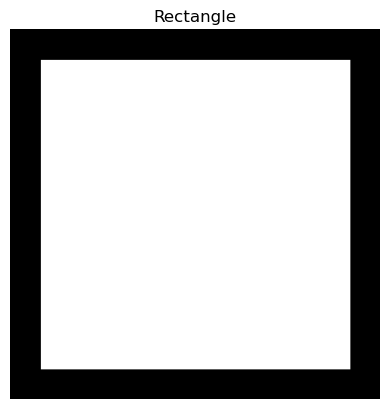

In [5]:
# Creating a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

# Displaying the image with title
plt.imshow(rectangle, cmap="gray")
plt.title("Rectangle")
plt.axis("off")  # To turn off the axis labels
plt.show()

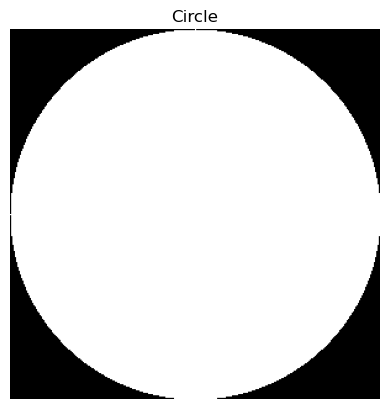

In [6]:
# Tạo hình tròn
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.imshow(circle, cmap='gray')
plt.title("Circle")
plt.axis('off')
plt.show()


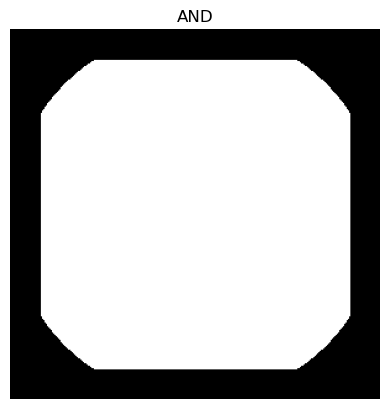

In [7]:
# Phép toán bitwise AND
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.imshow(bitwiseAnd, cmap='gray')
plt.title("AND")
plt.axis('off')
plt.show()


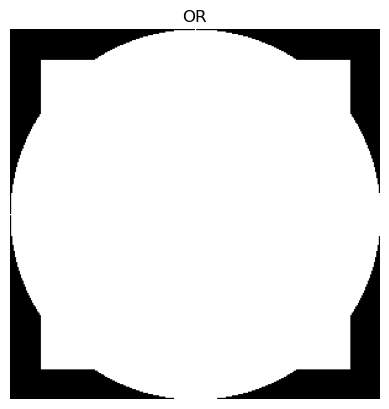

In [8]:

# Phép toán bitwise OR
bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR")
plt.axis('off')
plt.show()


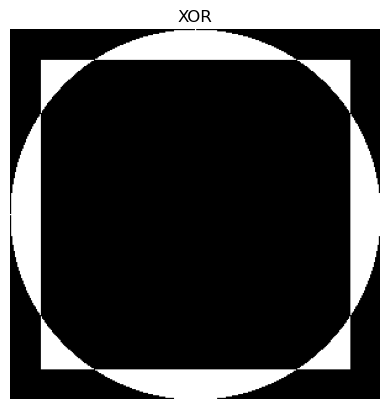

In [9]:

# Phép toán bitwise XOR
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR")
plt.axis('off')
plt.show()


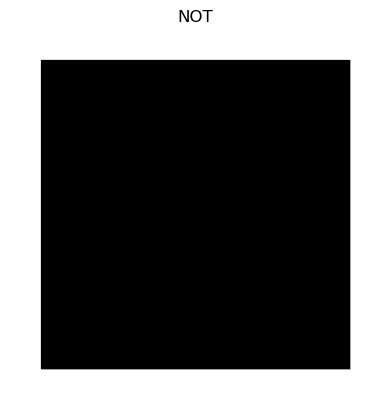

In [10]:

# Phép toán bitwise NOT
bitwiseNot = cv2.bitwise_not(rectangle)
plt.imshow(bitwiseNot, cmap='gray')
plt.title("NOT")
plt.axis('off')
plt.show()

## Apha blending


In [32]:
import cv2
src1 = cv2.imread('dataImage/lena.jpg')
src2 = cv2.imread('dataImage/rocket.jpg')
src2 = cv2.resize(src2, src1.shape[1::-1])

In [33]:
dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
cv2.imwrite('dataImage/opencv_add_weighted.jpg', dst)


True

## Image thresholding


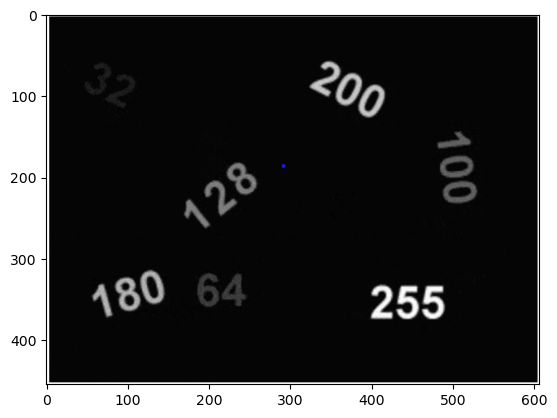

In [15]:
src_thres = cv2.imread('dataImage/thresholding.png')
plt.imshow(src_thres)

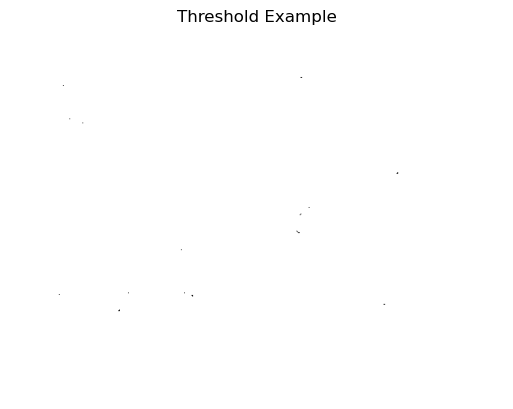

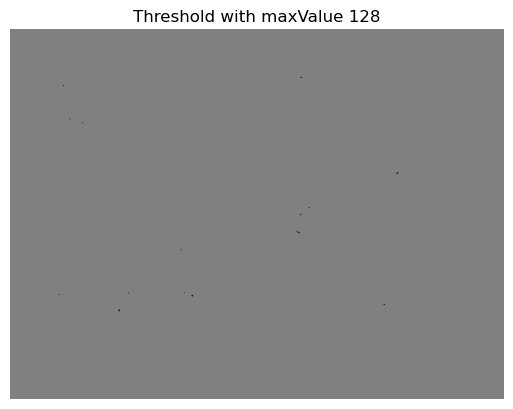

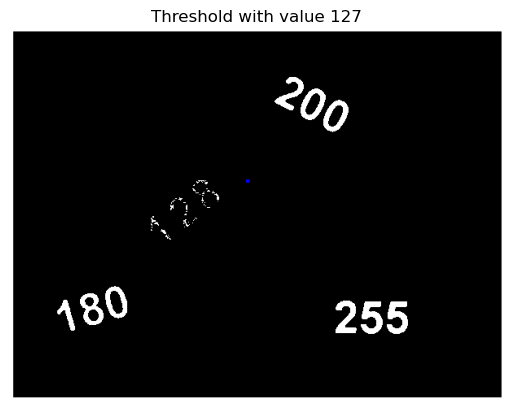

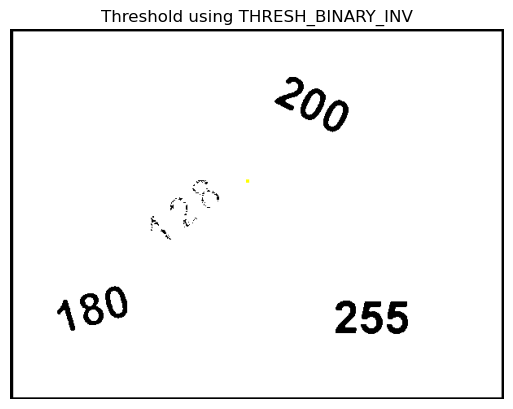

In [17]:
# Function to display images in Jupyter
def display_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Basic threshold example
th, dst = cv2.threshold(src_thres, 0, 255, cv2.THRESH_BINARY)
cv2.imwrite("opencv-threshold-example.jpg", dst)
display_image(dst, "Threshold Example")

# Thresholding with maxValue set to 128
th, dst = cv2.threshold(src_thres, 0, 128, cv2.THRESH_BINARY)
cv2.imwrite("opencv-thresh-binary-maxval.jpg", dst)
display_image(dst, "Threshold with maxValue 128")

# Thresholding with threshold value set to 127
th, dst = cv2.threshold(src_thres, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("opencv-thresh-binary.jpg", dst)
display_image(dst, "Threshold with value 127")

# Thresholding using THRESH_BINARY_INV
th, dst = cv2.threshold(src_thres, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("opencv-thresh-binary-inv.jpg", dst)
display_image(dst, "Threshold using THRESH_BINARY_INV")

## Exercise 1
- Extracting the faces from the input image using a circular mask.
Output is 3 of face images extracted from the input image.
Hint: Using circular masks as in the instructions above.

In [2]:
teacher = cv2.imread("dataImage/teachers.png")

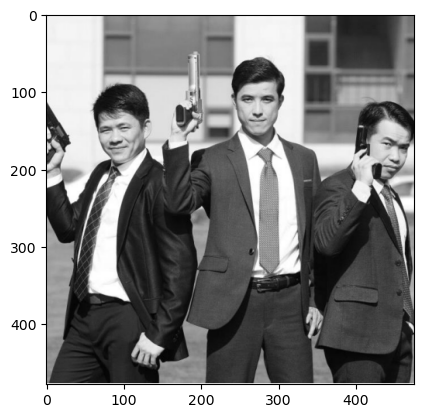

In [3]:
plt.imshow(teacher)

In [24]:
teacher.shape[:2]

(478, 476)

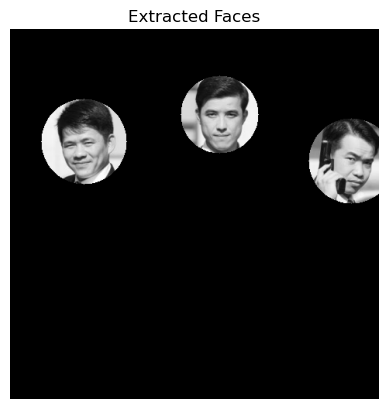

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh gốc
teacher = cv2.imread("dataImage/teachers.png")

# Tạo mặt nạ hình tròn cho các khuôn mặt
mask = np.zeros(teacher.shape[:2], dtype="uint8")
cv2.circle(mask, (95, 145), 55, 255, -1)      # Face 1
cv2.circle(mask, (270, 110), 50, 255, -1)    # Face 2
cv2.circle(mask, (440, 170), 55, 255, -1)    # Face 3

# Áp dụng mặt nạ hình tròn lên ảnh gốc
masked_image = cv2.bitwise_and(teacher, teacher, mask=mask)

# Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(masked_image_rgb)
plt.title("Extracted Faces")
plt.axis('off')
plt.show()


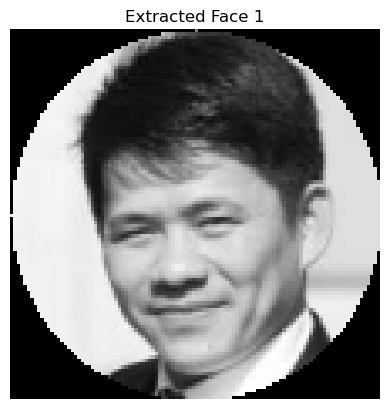

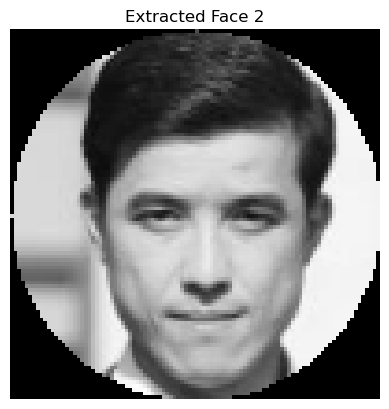

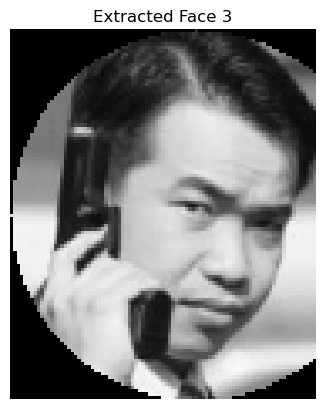

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh gốc

def extract_face(image, center, radius):
    # Tạo mặt nạ hình tròn
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, center, radius, 255, -1)
    
    # Áp dụng mặt nạ hình tròn lên ảnh gốc
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Cắt phần ảnh chứa khuôn mặt
    x, y = center
    cropped_face = masked_image[y-radius:y+radius, x-radius:x+radius]
    
    return cropped_face

# Tọa độ tâm và bán kính của các khuôn mặt
faces = [((95, 145), 55), ((270, 110), 50), ((440, 170), 55)]

# Trích xuất và hiển thị từng khuôn mặt
for i, (center, radius) in enumerate(faces):
    face_image = extract_face(teacher, center, radius)
    
    # Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
    face_image_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
    
    # Hiển thị ảnh
    plt.figure()
    plt.imshow(face_image_rgb)
    plt.title(f"Extracted Face {i+1}")
    plt.axis('off')
    plt.show()


## Exercise 2

In [28]:
tdtuLogo = cv2.imread("dataImage/TDTU_logo.png")

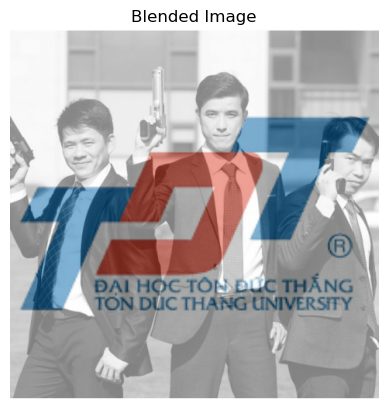

In [35]:
# Kích thước của ảnh logo và ảnh teachers phải giống nhau để có thể blend
# Resize ảnh logo để phù hợp với kích thước của ảnh teachers
tdtuLogo_resized = cv2.resize(tdtuLogo, (teacher.shape[1], teacher.shape[0]))

# Blend hai ảnh với trọng số alpha và beta
alpha = 0.5
beta = 1.0 - alpha
blended = cv2.addWeighted(teacher, alpha, tdtuLogo_resized, beta, 0)

# Chuyển đổi từ BGR sang RGB để hiển thị với matplotlib
blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(blended_rgb)
plt.title("Blended Image")
plt.axis('off')
plt.show()

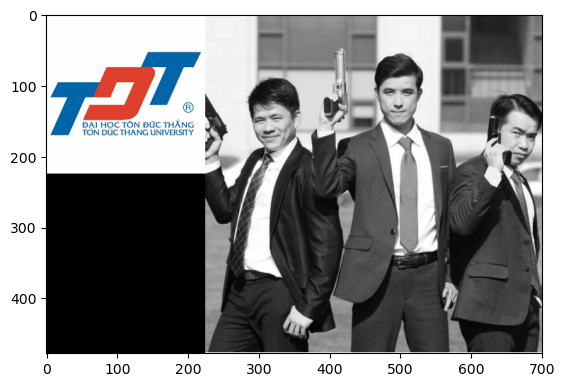

In [38]:
# Đọc ảnh
tdtuLogo = cv2.imread("dataImage/TDTU_logo.png")
teacher = cv2.imread("dataImage/teachers.png")

# Kiểm tra kích thước của ảnh để xác định kích thước của ảnh kết quả
height_logo, width_logo, _ = tdtuLogo.shape
height_teacher, width_teacher, _ = teacher.shape

# Tạo ảnh mới để chứa kết quả
result = np.zeros((max(height_logo, height_teacher), width_logo + width_teacher, 3), dtype=np.uint8)

# Đặt logo TDTU vào bên trái
result[:height_logo, :width_logo] = tdtuLogo

# Đặt ảnh của giáo viên vào bên phải
result[:height_teacher, width_logo:] = teacher

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
# Hiển thị hoặc lưu ảnh kết quả
plt.imshow(result_rgb)

## Exercise 3

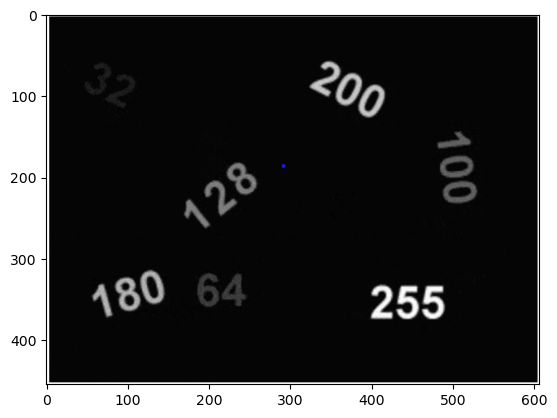

In [39]:
src_thres = cv2.imread('dataImage/thresholding.png')
plt.imshow(src_thres)

In [ ]:
# Function to display images in Jupyter
def display_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Basic threshold example
th, dst = cv2.threshold(src_thres, 0, 255, cv2.THRESH_BINARY)
cv2.imwrite("opencv-threshold-example.jpg", dst)
display_image(dst, "Threshold Example")

# Thresholding with maxValue set to 128
th, dst = cv2.threshold(src_thres, 0, 128, cv2.THRESH_BINARY)
cv2.imwrite("opencv-thresh-binary-maxval.jpg", dst)
display_image(dst, "Threshold with maxValue 128")
